In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataNASA = pd.read_csv("data/Resultado_area_influencia_3.csv")

In [3]:
dataNASA.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainIMR', 'areaInfluencia2', 'areaInfluencia_posterior_1',
       'areaInfluencia_posterior_2', 'diff_previa', 'diff_posterior',
       'Rango_previo', 'Rango_posterior', 'validacionEvento', 'Fecha', 'Hora',
       '0pre', '1-5pre', '20-25pre', '25-30pre', '>30pre', '10-15pre',
       '5-10pre', '15-20pre', '0'],
      dtype='object')

In [4]:
dataNASA["areaInfluencia2"].describe()

count    3.328566e+06
mean     8.002191e-02
std      8.559817e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.278403e+02
Name: areaInfluencia2, dtype: float64

In [5]:
dataNASA.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,...,Hora,0pre,1-5pre,20-25pre,25-30pre,>30pre,10-15pre,5-10pre,15-20pre,0
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,...,00:00,1,0,0,0,0,0,0,0,0
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,...,00:30,1,0,0,0,0,0,0,0,0
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,...,01:00,1,0,0,0,0,0,0,0,0
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,...,01:30,1,0,0,0,0,0,0,0,0
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,...,02:00,1,0,0,0,0,0,0,0,0


In [6]:
dataWRF = pd.read_csv("data/Resultado_wrf_1.csv")

In [7]:
dataWRF.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainWRF,...,Hora_Formato,0pre,1-5pre,5-10pre,>30pre,20-25pre,10-15pre,0,25-30pre,15-20pre
0,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.0,0.0,...,00:00,1,0,0,0,0,0,0,0,0
1,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.5,0.0,...,00:30,1,0,0,0,0,0,0,0,0
2,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.0,0.0,...,01:00,1,0,0,0,0,0,0,0,0
3,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.5,0.0,...,01:30,1,0,0,0,0,0,0,0,0
4,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,2.0,0.0,...,02:00,1,0,0,0,0,0,0,0,0


In [8]:
def generarEstacion(m,d):
    if m == 1 or m == 2:
        return "WINTER"
    if m == 3:
        if d < 21:
            return "WINTER"
        else:
            return "SPRING"
    if m == 4 or m == 5:
        return "SPRING"
    if m == 6:
        if d < 22:
            return "SPRING"
        else:
            return "SUMMER"
    if m == 7 or m == 8:
        return "SUMMER"
    if m == 9:
        if d < 22:
            return "SUMMER"
        else:
            return "AUTUMN"
    if m == 10 or m == 11:
        return "AUTUMN"
    if m == 12:
        if d < 21:
            return "AUTUMN"
        else:
            return "WINTER"

In [9]:
dataNASA["estacion"] = dataNASA.apply(lambda x: generarEstacion(x["Month"], x["Day"]), axis=1)

In [10]:
dataWRF["estacion"] = dataWRF.apply(lambda x: generarEstacion(x["Month"], x["Day"]), axis=1)

In [11]:
dataNASA.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,...,0pre,1-5pre,20-25pre,25-30pre,>30pre,10-15pre,5-10pre,15-20pre,0,estacion
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,...,1,0,0,0,0,0,0,0,0,WINTER


In [12]:
dataWRF.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainWRF,...,0pre,1-5pre,5-10pre,>30pre,20-25pre,10-15pre,0,25-30pre,15-20pre,estacion
0,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
1,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.5,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
2,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
3,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.5,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
4,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,2.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN


In [13]:
dataNASA.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainIMR', 'areaInfluencia2', 'areaInfluencia_posterior_1',
       'areaInfluencia_posterior_2', 'diff_previa', 'diff_posterior',
       'Rango_previo', 'Rango_posterior', 'validacionEvento', 'Fecha', 'Hora',
       '0pre', '1-5pre', '20-25pre', '25-30pre', '>30pre', '10-15pre',
       '5-10pre', '15-20pre', '0', 'estacion'],
      dtype='object')

In [14]:
dataNASA = dataNASA[['Canon', 'Estado', 'Nombre', 'Long','Lat', 'Year', 'Month', 'Day', 'Hour', 'RainIMR', 'areaInfluencia2', 'estacion']]

In [15]:
dataWRF.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainWRF', 'RainWRF_posterior_1', 'RainWRF_posterior_2',
       'diff_previa', 'diff_posterior', 'Rango_previo', 'Rango_posterior',
       'validacionEvento', 'Fecha', 'Hora_Formato', '0pre', '1-5pre',
       '5-10pre', '>30pre', '20-25pre', '10-15pre', '0', '25-30pre',
       '15-20pre', 'estacion'],
      dtype='object')

In [16]:
dataWRF = dataWRF[['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year','Month', 'Day', 'Hour', 'RainWRF','Fecha', '0pre', '10-15pre', '5-10pre', '15-20pre', '25-30pre', '20-25pre', '1-5pre', '>30pre', '0', 'estacion']]

In [17]:
dataWRF.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre', '15-20pre',
       '25-30pre', '20-25pre', '1-5pre', '>30pre', '0', 'estacion'],
      dtype='object')

In [18]:
def generarFecha(y,m,d,h):
    return "{}-{}-{} {}".format(y,complementarValor(m),complementarValor(d),h)

def complementarValor(v):
    if v < 10:
        return "0{}".format(v)
    else:
        return "{}".format(v)

def generarHora(h):
    hour = int(h / 60)
    if hour < 10:
        hour = "0{}".format(hour)
    minutes = h % 60
    if minutes < 10:
        minutes = "0{}".format(minutes)
    return "{}:{}".format(hour, minutes)

def convertir_hora_decimal_a_hora_minutal(h):
    h = str(h)
    hora, minutos = h.split(".")
    if len(hora) < 2:
        hora = "0{}".format(hora)

    if minutos == "5":
        minutos = "30"
    else:
        minutos = "00"
    tiempo = "{}:{}".format(hora, minutos)

    return tiempo

In [19]:
dataNASA.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,areaInfluencia2,estacion
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,0.0,WINTER
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,0.0,WINTER
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,0.0,WINTER
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,0.0,WINTER
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,0.0,WINTER


In [20]:
dataNASA["Hora"] = dataNASA.apply(lambda x: generarHora(x["Hour"]), axis=1)

In [21]:
dataNASA.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainIMR,areaInfluencia2,estacion,Hora
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,0.0,WINTER,00:00
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,0.0,WINTER,00:30
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,0.0,WINTER,01:00
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,0.0,WINTER,01:30
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,0.0,WINTER,02:00


In [22]:
dataWRF.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainWRF,...,0pre,10-15pre,5-10pre,15-20pre,25-30pre,20-25pre,1-5pre,>30pre,0,estacion
0,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
1,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.5,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
2,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
3,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.5,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN
4,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,2.0,0.0,...,1,0,0,0,0,0,0,0,0,AUTUMN


In [23]:
dataWRF["Hora"] = dataWRF.apply(lambda x: convertir_hora_decimal_a_hora_minutal(x["Hour"]), axis=1)

In [24]:
dataWRF.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour,RainWRF,...,10-15pre,5-10pre,15-20pre,25-30pre,20-25pre,1-5pre,>30pre,0,estacion,Hora
0,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.0,0.0,...,0,0,0,0,0,0,0,0,AUTUMN,00:00
1,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,0.5,0.0,...,0,0,0,0,0,0,0,0,AUTUMN,00:30
2,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.0,0.0,...,0,0,0,0,0,0,0,0,AUTUMN,01:00
3,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,1.5,0.0,...,0,0,0,0,0,0,0,0,AUTUMN,01:30
4,1,MICH,La Alberca,-102.006289,19.474989,2013,11,6,2.0,0.0,...,0,0,0,0,0,0,0,0,AUTUMN,02:00


In [25]:
dataWRF.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre', '15-20pre',
       '25-30pre', '20-25pre', '1-5pre', '>30pre', '0', 'estacion', 'Hora'],
      dtype='object')

In [33]:
dataNASA.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour', 'RainIMR', 'areaInfluencia2', 'estacion', 'Hora'],
      dtype='object')

In [26]:
data = pd.merge(dataNASA, dataWRF, how='inner', on=['Canon','Estado','Nombre','Long', 'Lat','Year','Month','Day','Hora'])

In [27]:
data.head()

,Canon,Estado,Nombre,Long,Lat,Year,Month,Day,Hour_x,RainIMR,...,0pre,10-15pre,5-10pre,15-20pre,25-30pre,20-25pre,1-5pre,>30pre,0,estacion_y
0,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,0,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
1,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,30,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
2,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,60,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
3,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,90,0.0,...,1,0,0,0,0,0,0,0,0,WINTER
4,1,MICH,La Alberca,-102.006289,19.474989,2014,3,12,120,0.0,...,1,0,0,0,0,0,0,0,0,WINTER


In [28]:
data.columns

Index(['Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year', 'Month', 'Day',
       'Hour_x', 'RainIMR', 'areaInfluencia2', 'estacion_x', 'Hora', 'Hour_y',
       'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre', '15-20pre',
       '25-30pre', '20-25pre', '1-5pre', '>30pre', '0', 'estacion_y'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308608 entries, 0 to 2308607
Data columns (total 26 columns):
Canon              int64
Estado             object
Nombre             object
Long               float64
Lat                float64
Year               int64
Month              int64
Day                int64
Hour_x             int64
RainIMR            float64
areaInfluencia2    float64
estacion_x         object
Hora               object
Hour_y             float64
RainWRF            float64
Fecha              object
0pre               int64
10-15pre           int64
5-10pre            int64
15-20pre           int64
25-30pre           int64
20-25pre           int64
1-5pre             int64
>30pre             int64
0                  int64
estacion_y         object
dtypes: float64(6), int64(14), object(6)
memory usage: 475.6+ MB


In [30]:
data.to_csv("data/data_nasa_wrf_merge_3.csv")

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv("data/data_nasa_wrf_merge_3.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308608 entries, 0 to 2308607
Data columns (total 27 columns):
Unnamed: 0         int64
Canon              int64
Estado             object
Nombre             object
Long               float64
Lat                float64
Year               int64
Month              int64
Day                int64
Hour_x             int64
RainIMR            float64
areaInfluencia2    float64
estacion_x         object
Hora               object
Hour_y             float64
RainWRF            float64
Fecha              object
0pre               int64
10-15pre           int64
5-10pre            int64
15-20pre           int64
25-30pre           int64
20-25pre           int64
1-5pre             int64
>30pre             int64
0                  int64
estacion_y         object
dtypes: float64(6), int64(15), object(6)
memory usage: 475.6+ MB


In [6]:
data.columns

Index(['Unnamed: 0', 'Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year',
       'Month', 'Day', 'Hour_x', 'RainIMR', 'areaInfluencia2', 'estacion_x',
       'Hora', 'Hour_y', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre',
       '15-20pre', '25-30pre', '20-25pre', '1-5pre', '>30pre', '0',
       'estacion_y'],
      dtype='object')

In [11]:
dataToSeaborn = data[['RainIMR', 'RainWRF', 'estacion_y']]

In [12]:
dataToSeaborn["diff"] = abs(dataToSeaborn["RainIMR"] - data["RainWRF"])

/home/jorge/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
dataToSeaborn.head()

,RainIMR,RainWRF,estacion_y,diff
0,0.0,0.0,WINTER,0.0
1,0.0,0.0,WINTER,0.0
2,0.0,0.0,WINTER,0.0
3,0.0,0.0,WINTER,0.0
4,0.0,0.0,WINTER,0.0


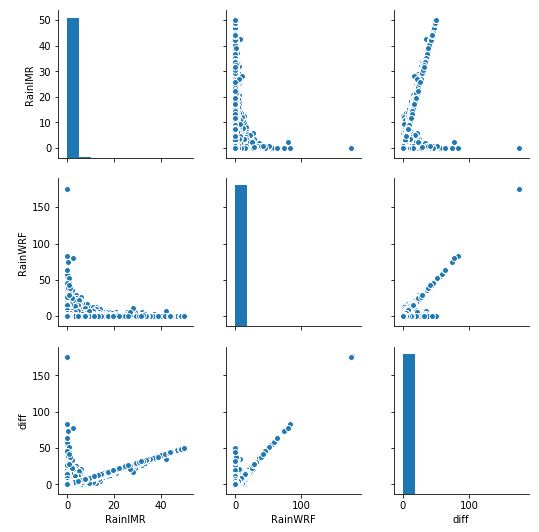

In [14]:
sns.pairplot(dataToSeaborn)

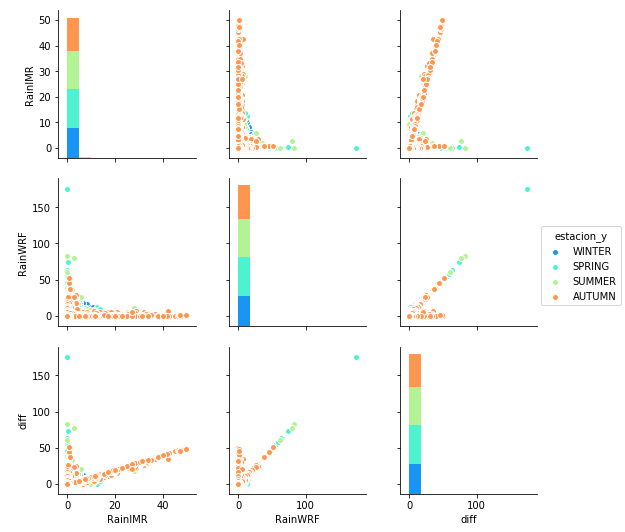

In [15]:
sns.pairplot(dataToSeaborn, hue="estacion_y", palette="rainbow")

In [16]:
data.columns

Index(['Unnamed: 0', 'Canon', 'Estado', 'Nombre', 'Long', 'Lat', 'Year',
       'Month', 'Day', 'Hour_x', 'RainIMR', 'areaInfluencia2', 'estacion_x',
       'Hora', 'Hour_y', 'RainWRF', 'Fecha', '0pre', '10-15pre', '5-10pre',
       '15-20pre', '25-30pre', '20-25pre', '1-5pre', '>30pre', '0',
       'estacion_y'],
      dtype='object')

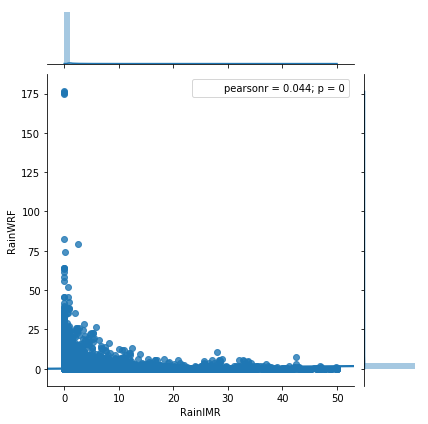

In [17]:
sns.jointplot(x='RainIMR',y='RainWRF',data=data,kind='reg')

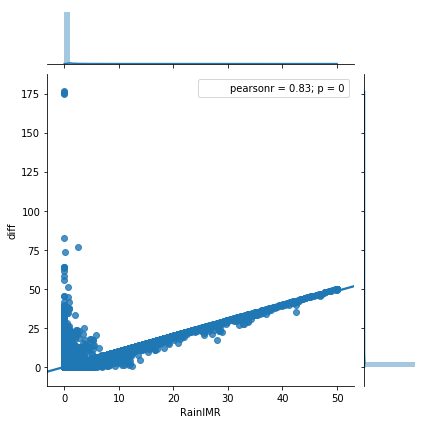

In [22]:
sns.jointplot(x='RainIMR',y='diff',data=dataToSeaborn,kind='reg')

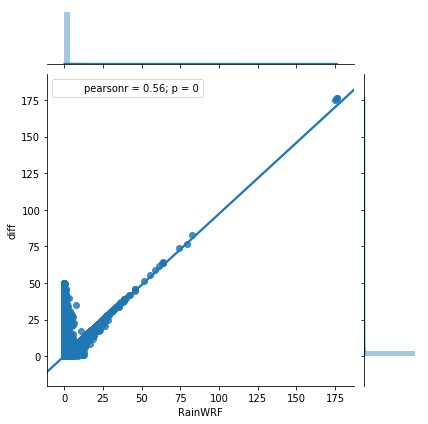

In [23]:
sns.jointplot(x='RainWRF',y='diff',data=dataToSeaborn,kind='reg')